<a href="https://colab.research.google.com/github/jtunde/Python/blob/main/ss1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
data = pd.read_csv('drive/MyDrive/attack.csv')
data.sample(10)

,No.,Time,Source,Destination,Protocol,Length,Info
7,8,10.084998,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=12/3072, t..."
8,9,11.088884,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=13/3328, t..."
1,2,0.999878,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=3/768, ttl..."
4,5,5.032151,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=7/1792, tt..."
10,11,13.093606,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=15/3840, t..."
6,7,9.083788,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=11/2816, t..."
3,4,4.031092,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=6/1536, tt..."
5,6,7.071026,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=9/2304, tt..."
11,12,15.136117,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=17/4352, t..."
2,3,2.001209,10.0.0.3,10.0.0.1,ICMP,98,"Echo (ping) request id=0x15be, seq=4/1024, tt..."


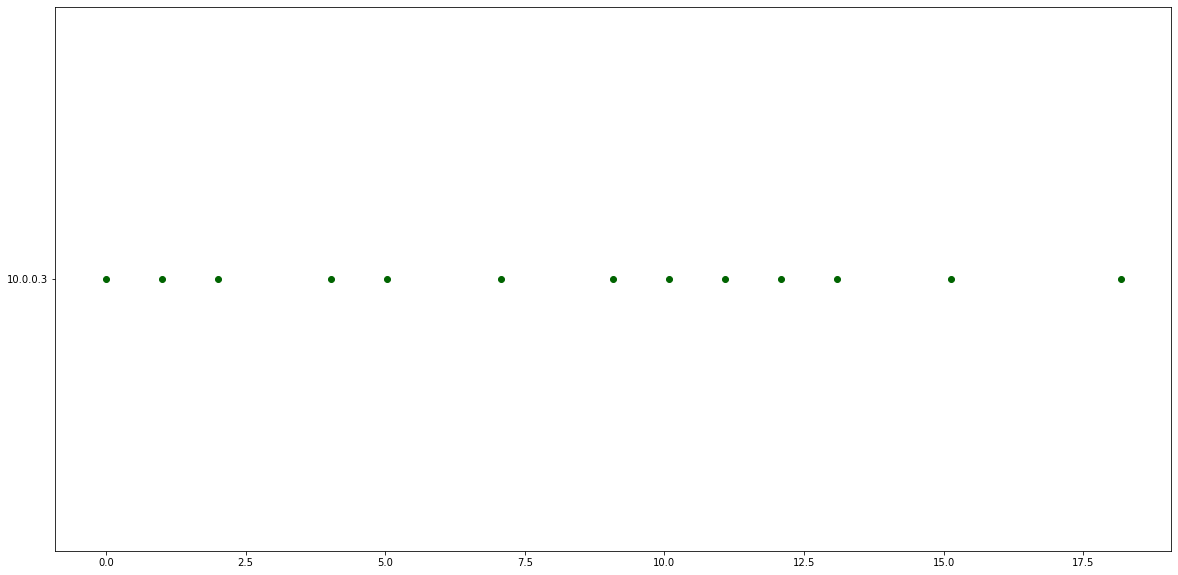

In [15]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data['Time'], data['Source'], 'o', color='DarkGreen')

In [16]:
data['Time'].describe()

count    13.000000
mean      8.298775
std       5.666903
min       0.000000
25%       4.031092
50%       9.083788
75%      12.090049
max      18.171275
Name: Time, dtype: float64

In [17]:
data['Protocol'].describe()

count       13
unique       1
top       ICMP
freq        13
Name: Protocol, dtype: object

In [ ]:
def beolvas():
    T = []
    L = []
    M = []
    P = []
    Q = []
    R = []
    
    for j in range(len(data)):
        T=data['Info'][j]        
        db=0
        n = len(T)
        i = 0
        
        S = []
        while T[i] != ' ':#az echo
            S+=T[i]
            i+=1
        L += [S]

        db = 0
        while db != 2:
            if T[i] == '=':#a tort elso szamjegye
                db += 1
            i += 1

        a = 0
        a1 = 0
        while T[i] != '/':#a tort masodik szamjegye
            a=int(T[i])
            a1=a1*10+a
            i+=1
        M+=[a1]

        i+=1
        
        b = 0
        b1 = 0
        while T[i] != ',':
            b=int(T[i])
            b1=b1*10+b
            i+=1
        P+=[b1]
        Q+=[a1/b1]

        while T[i] != '=':
            i+=1

        i+=1
        
        c = 0
        c1 = 0
        while T[i] != ' ':#harmadik szamjegy
            c=int(T[i])
            c1=c1*10+c
            i+=1
        R+=[c1]
        

    return L, M, P, Q, R


In [ ]:
    L, M, P, Q, R = beolvas()
    
    print(L)
    print(M)
    print(P)
    print(Q)
    print(R)

[['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o'], ['E', 'c', 'h', 'o']]
[2, 3, 4, 6, 7, 9, 11, 12, 13, 14, 15, 17, 20]
[512, 768, 1024, 1536, 1792, 2304, 2816, 3072, 3328, 3584, 3840, 4352, 5120]
[0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625, 0.00390625]
[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
